# **_3 Pandas 모듈과 패키지_**
**금융데이터를 활용한 파이썬 기초**

언의의 내용과 개념을 있는 그대로 받아들이고 이해하려고 노력하자

<br>
### **review Python Data & Datum**
Python 기본문법 - 기본문법 등을 아래의 3가지 서랍속에 체계적 정리하기 
1. Datum &nbsp;&nbsp; : &nbsp;&nbsp; 숫자, &nbsp;"문자" 
1. Data &nbsp;&nbsp; : &nbsp; [list], &nbsp; {dict}, &nbsp; (tuple,)
1. Function : indent, 모듈, 클래스, 함수, 메소드(추가 입력값 필요, 추가 입력값 불필요)
1. []의 함수적 활용 
    1. 색인기능 [index], [:slicing])
    1. 함수를 활용하여 데이터 생성 &nbsp; [ &nbsp; datum &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력 ]
1. {}의 함수적 활용 
    1. 함수를 활용하여 데이터 생성 &nbsp; { &nbsp; key &nbsp; : &nbsp; value &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력}
1. 연결기호 : ', ", '=',  [], {}, () (개별적 쓰임새와 숨은 의미들이 정해져 있다)

<br>
### ** I Python 활용**
jupyter notebook
1. 파이썬 반응결과를 Javascript로 웹브라우저에서 구현한다
1. https://notebooks.azure.com/ : 무료가입후 바로 사용가능, 외부 데이터 수집등 제약이 있다
1. https://docs.aws.amazon.com/ko_kr/dlami/latest/devguide/setup-jupyter-start-server.html : 설치가 어렵지만 AWS 무료 가입후 설치 가능
1. 대신 cell 단위로 작업결과를 확인함으로써, 부분 부분적인 디버깅이 가능
1. 상대적 작은 size 작업에 용이하다
1. 여러 파일들을 함께 관리하기에는 부족한 점이 있다 (PyCharm, Sublime Text을 같이 활용하여 극복)

<br>
### **'%' Magic Keyword**
1. **_%who_** : 현재까지 메모리에 올려진 객체들 확인
1. **_%reset_** : 메모리 초기화
1. **_%matplotlib inline_** : matplotlib 시각화를 Cell 내부에 포함해서 출력한다
1. **_%debug_** : 최근 예외상황 및 아래행의 대화형 디버그 진입
1. **_%pdb_** : 예외가 발생하면 자동으로 debug 진입
1. **_%time_** : 단일 statement 실행시간
1. **_%timtit_** : 여러번 statement 평균 실행시간

<br>
#### **PREVIEW 2**
pandas 로 http://finance.daum.net/quote/all.daum?nil_stock=refresh 의 전종목 시세를 수집하기

In [1]:
# http://finance.daum.net/quote/all.daum?nil_stock=refresh
# 현재 종가데이터 수집하기
def total_table():
    import pandas as pd
    url         = "http://finance.daum.net/quote/all.daum?nil_stock=refresh"
    toplist     = pd.read_html(url)
    result      = [table  for i, table in enumerate(toplist)   if i >0]
    df          = pd.concat(result, axis=0).dropna()
    df.columns  = df.iloc[0,:]
    df          = df.drop(df.index[0])
    return df

df = total_table()
df.head(3)

,종목명,현재가,등락률,종목명,현재가,등락률
2,GS건설,49050,+1.98%,HDC아이콘트롤스,18200,-1.62%
3,계룡건설,33100,+1.85%,고려개발,7640,-3.29%
4,금호산업,13550,-0.73%,금호산업우,37500,+29.98%


In [2]:
%whos

Variable      Type         Data/Info
------------------------------------
df            DataFrame    0         종목명      현재가   <...>n\n[442 rows x 6 columns]
total_table   function     <function total_table at 0xb42cff60>


<br>
## **1 Pandas  &nbsp;&nbsp; & &nbsp;&nbsp; Numpy**
- **numpy** : 엑셀의 내부 함수 모음 ( pandas의 메소드 함수역활)
 - **pandas** : 엑셀의 단축키 , sheets 등 부가기능 모음
 - 함께 뒤 섞여서 활용
<br>
</br><img src = "http://pbpython.com/images/pandas-dataframe-shadow.png" align="left" width='800'>

In [3]:
#### 모듈의 요약
# 파이썬은 내장함수만 구현 가능한 프로그램
# 이를 활용하여 Wes McKinney가 작성한 함수들의 묶음이 Pandas
# Pandas라는 이름으로 함수들을 묶어서 https://pandas.pydata.org/ 공개
# pip 프로그램으로 Python 관련 폴더에 함수들의 *.py 파일들을 자동으로 복붙한다
# import c:/python/site-package/pandas/pandas.py.. 로 복잡하게 열지 않고
# import pandas... 만으로 해당 파일을 메모리에 올린다

In [4]:
#### 메서드의 요약
# 송강호의 메소드 연기, 강소라의 메소드 연기, '용엄마'의 메소드 연기....
# 메소드 : 배우의 생각과 감정을 배역에 완전히 몰입시켜 연기하는 기법
# 메소드는 주체마다 다르게 정의가 된다 (주체에 종속되는 변수들)
# python 기본 메소드
# pandas 관련 메소드 (python 기본 메소드를 응용해서 제작한다)

In [5]:
#### Python 기본 함수, 메소드들을 잘 알면 배울 내용들이 쉽게 유추 및 정리가 가능하다
# 모듈을 만들 때, 기본 함수/메소드를 응용해서 만든다
# 개별 모듈에서 기본 함수/메소드의 공통점을 정리/확인한 뒤
# 각 각에만 특징적으로 정리된 내용들만 요약 정리하면, 쉽게 진도를 나아갈 수 있다
# 말이 쉽지....

<br>
## **2 'Series'  in Pandas**
1. **DataFrame** : 전체 표
1. **Series(일련, 연속 ,한벌의)** : 전체 표중 1줄을 추출 (가로/세로) 한 객체로 [list] 의 확장된 포맷
1. 표를 생성 후 편집 수정 및 **'시각화'** 를 위한 데이터
1. **[list]와** 공통적인 속성을 복습을 하면서 유추를 하고, 다른 몇가지 특징만 외우면 된다

<br>
### **01 [ list ] 와 비교**
list 를 바탕으로 Series 이해하기

In [6]:
lists = [4,2,-1,1,-2,-3,4,5]
lists

[4, 2, -1, 1, -2, -3, 4, 5]

In [7]:
import pandas as pd
data = pd.Series(lists)
data
# index 가 옆에 노출되었을 뿐 내용과 개념은 동일!!!
# 그럼에도 왜 쓰냐?? - 1) DataFrame의 .메소드 확장기능을 사용가능
#                   2) Matrix 등의 연산시 "30배 속도"가 향상 (C++로 내부 연산이 처리된다)
#                   3) matplotlib 모듈등과도 연동이 쉽다

0    4
1    2
2   -1
3    1
4   -2
5   -3
6    4
7    5
dtype: int64

In [8]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [9]:
data.values

array([ 4,  2, -1,  1, -2, -3,  4,  5], dtype=int64)

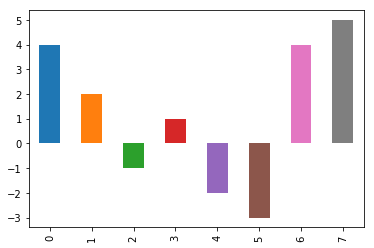

In [10]:
%matplotlib inline
data.plot(kind='bar')

<br>
### ** 02 { dict } 와 비교**
dict 를 바탕으로 Series 이해하기

In [11]:
# index 에 임의의 이름을 부여 가능
# 그러면서도 순서 속성은 그대로 유지
data = pd.Series([4, 7, -5, 3], 
                 index = ['seoul', 'dajun', 'daegu','busan'])
data

seoul    4
dajun    7
daegu   -5
busan    3
dtype: int64

In [12]:
# dict 데이터를 Series로 변환
dict_data = {'seoul':4, 'dajun':7, 'daegu':-5, 'busan':3}
pd.Series(dict_data)

busan    3
daegu   -5
dajun    7
seoul    4
dtype: int64

In [13]:
data.index

Index(['seoul', 'dajun', 'daegu', 'busan'], dtype='object')

In [14]:
data['seoul']

4

### **03 Series 의 함수적 속성**
1. 사칙연산 : 모든 index에 연산을 순차적으로 적용한다
1. [ boolean 조건함수 ] 

In [15]:
data * 2

seoul     8
dajun    14
daegu   -10
busan     6
dtype: int64

In [16]:
data [ data > 5 ]

dajun    7
dtype: int64

In [17]:
# Series 가 제공하는 다양한 메소드를 활용가능
data.isnull()

seoul    False
dajun    False
daegu    False
busan    False
dtype: bool

In [18]:
# [list] 의 덧셈은 연결이지만, 
# index 특징이 고정된 series는 주소간의 데이터 연산결과를 출력한다
data2 = pd.Series([-4, 3, -5], 
                  index = ['dajun', 'daegu','busan'])
data + data2

busan   -2.0
daegu   -2.0
dajun    3.0
seoul    NaN
dtype: float64

In [19]:
# index만 번경도 가능하다
data2.index = [1,2,3]
data2

1   -4
2    3
3   -5
dtype: int64

#### **Quiz**
    range() 로 10부터 1까지 1씩 감소하는 [ list ] 를 만들고
    이를 Series 로 변환한 뒤, 
    line 차트로 시각화를 하라
    
hint : **range(10,0,-1)**

In [20]:
# [ i    for i in range(10,0,-1)]

<br>
## **3 'DataFrame'  in Pandas** 
Excel Sheet 의 모든 것!!!
<br><br></br>
### **01 Table 생성**
Series , list --> DataFrame

In [21]:
# Series 형태의 DataFrame도 가능,
# 데이터 내용은 동일하고 단지 담는 그릇이 다르다 
# 차이점은 화면에 표시되는 내용과, 적용되는 Method 들이 다르다
import pandas as pd
pd.DataFrame(data)

,0
seoul,4
dajun,7
daegu,-5
busan,3


In [22]:
# 합집합 결과를 출력한다
data3 = [10,9,8,7,6,5,7]
df = pd.DataFrame( {'first_col' : data, 
                    'second_col': data2, 
                    'third_col' : data3} )
df

# Series, list 여러개를 1개의 Table로 구성하기
# 객체가 Series : index 가 일치하지 않아도 조합이 가능 (자동조절)            ex) data, data2
# 객체가 list   : index '길이'가 맞이야만 조합이 가능 (순서는 그대로 삽입)    ex) data3
#              : 컬럼의 모든 데이터를 일괄 처리에 용이 (주로 전처리 작업에 활용)

/home/erdos/python/django/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


<br>
### **02 Index**
DataFrame 의 기본 틀 수정하기
1. .reset_index() : 순차적인 index로 새롭게 재정의 하기
1. .rename(columns={원본:수정}
1. .set_index(컬럼명)

In [23]:
# index 01 : index to Column
df = df.reset_index()
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [24]:
# index 02 :  Column  to index
df = df.rename(columns={'index':'city'})
df

,city,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [25]:
df = df.set_index('city')
df

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [26]:
# index 삭제
df.drop('busan', axis = 0)

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


####  **_인덱스의 수정...  Solution_**
1. index 를 [ list ] 로 추출 후, 수정한 뒤 수정된 list 를 index 로 덧붙인다.
1. https://stackoverflow.com/questions/40427943/how-do-i-change-a-single-index-value-in-pandas-dataframe

In [27]:
df_index    = df.index.tolist()
df_index[4] = 'Jeju'
df_index

['seoul', 'dajun', 'daegu', 'busan', 'Jeju', 2, 3]

In [28]:
df.index = df_index
df

,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
Jeju,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


<br>
### **03 Columns**
DataFrame 의 Columns 바꾸기 및 재정렬

In [29]:
# Cell의 내용 바꾸기
df.second_col['daegu'] = 7   # second_col : 컬럼, 'daegu' : index
df

/home/erdos/python/django/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
Jeju,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [30]:
# 컬럼명 변경하기
df = df.reset_index()
df.rename(columns={ 'level_0'   : '도시명',
                   'first_col'  : '보건소',
                   'second_col' : '경찰서', 
                   'third_col'  : '도서관'}) #, inplace=True)

,index,보건소,경찰서,도서관
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [31]:
# 컬럼명 변경하기 2
rename = ['index', '도시명', 'index', '보건소', '경찰서', '도서관']
result = {}
{ col : rename[no]     for no, col in enumerate(df.columns)}

{'first_col': '도시명',
 'index': 'index',
 'second_col': 'index',
 'third_col': '보건소'}

In [32]:
# 변경한 컬럼명 적용하기
df.rename(columns = result)

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [33]:
# column 추가 
# {dict} 에서 데이터 생성과 '규칙'이 동일하다
# 단일 객체로 column 채우며 생성
df['Year'] = '2018'
df

,index,first_col,second_col,third_col,Year
0,seoul,4.0,NaN,10,2018
1,dajun,7.0,NaN,9,2018
2,daegu,-5.0,7.0,8,2018
3,busan,3.0,NaN,7,2018
4,Jeju,NaN,-4.0,6,2018
5,2,NaN,3.0,5,2018
6,3,NaN,-5.0,7,2018


In [34]:
# column 삭제
df = df.drop('Year', axis = 1)
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [35]:
# column 추가 2
# 동일한 객체로 column 채우며 생성

df.insert(0, 'Year', '2018')
df

,Year,index,first_col,second_col,third_col
0,2018,seoul,4.0,NaN,10
1,2018,dajun,7.0,NaN,9
2,2018,daegu,-5.0,7.0,8
3,2018,busan,3.0,NaN,7
4,2018,Jeju,NaN,-4.0,6
5,2018,2,NaN,3.0,5
6,2018,3,NaN,-5.0,7


In [36]:
# column 생성2
# 동일한 객체로 column 채우며 생성
df.insert(1,'month', '04')
df

,Year,month,index,first_col,second_col,third_col
0,2018,04,seoul,4.0,NaN,10
1,2018,04,dajun,7.0,NaN,9
2,2018,04,daegu,-5.0,7.0,8
3,2018,04,busan,3.0,NaN,7
4,2018,04,Jeju,NaN,-4.0,6
5,2018,04,2,NaN,3.0,5
6,2018,04,3,NaN,-5.0,7


<br>
### **04 Sorting**
데이터 정렬하기

In [37]:
# .sort_index( axis =  )  # 인덱스를 기준으로 정렬
# axis = 0 : index
# axis = 1 : column
df.sort_index(axis = 0, ascending=False)

,Year,month,index,first_col,second_col,third_col
6,2018,04,3,NaN,-5.0,7
5,2018,04,2,NaN,3.0,5
4,2018,04,Jeju,NaN,-4.0,6
3,2018,04,busan,3.0,NaN,7
2,2018,04,daegu,-5.0,7.0,8
1,2018,04,dajun,7.0,NaN,9
0,2018,04,seoul,4.0,NaN,10


In [38]:
# .sort_values( by = '컬럼명')
# 특정 컬럼의 데이터를 정렬
df.sort_values(by='third_col')

,Year,month,index,first_col,second_col,third_col
5,2018,04,2,NaN,3.0,5
4,2018,04,Jeju,NaN,-4.0,6
3,2018,04,busan,3.0,NaN,7
6,2018,04,3,NaN,-5.0,7
2,2018,04,daegu,-5.0,7.0,8
1,2018,04,dajun,7.0,NaN,9
0,2018,04,seoul,4.0,NaN,10


<br>
### **05 Series 를 활용한 시계열 데이터 다루기**
1. pd.date_range(시작일, 종료일) : 시계열 데이터
1. .date : 날짜만 추출
1. https://stackoverflow.com/questions/25478773/creating-a-list-with-data-from-a-dataframe-index-in-python

In [39]:
import pandas as pd
date_list = pd.date_range('2017-7-1','2017-7-7')
date_list

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07'],
              dtype='datetime64[ns]', freq='D')

In [40]:
[ str(date)  for date in date_list ]

['2017-07-01 00:00:00',
 '2017-07-02 00:00:00',
 '2017-07-03 00:00:00',
 '2017-07-04 00:00:00',
 '2017-07-05 00:00:00',
 '2017-07-06 00:00:00',
 '2017-07-07 00:00:00']

In [41]:
[ ts.date() for ts in date_list ]  # a list of datetime.date's

[datetime.date(2017, 7, 1),
 datetime.date(2017, 7, 2),
 datetime.date(2017, 7, 3),
 datetime.date(2017, 7, 4),
 datetime.date(2017, 7, 5),
 datetime.date(2017, 7, 6),
 datetime.date(2017, 7, 7)]

In [42]:
date_list = [ str(ts.date()) for ts in date_list ]  # a list of datetime.date's
date_list

['2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-07-05',
 '2017-07-06',
 '2017-07-07']

In [43]:
# [ list ] 객체로 column을 채우며 생성
# 단 '자료의 길이' 가 동일해야 한다 (아니면 오류가 발생!!!)
df.insert(0,'Date',date_list)
df

,Date,Year,month,index,first_col,second_col,third_col
0,2017-07-01,2018,04,seoul,4.0,NaN,10
1,2017-07-02,2018,04,dajun,7.0,NaN,9
2,2017-07-03,2018,04,daegu,-5.0,7.0,8
3,2017-07-04,2018,04,busan,3.0,NaN,7
4,2017-07-05,2018,04,Jeju,NaN,-4.0,6
5,2017-07-06,2018,04,2,NaN,3.0,5
6,2017-07-07,2018,04,3,NaN,-5.0,7


#### Quiz
    아래 테이블에서 'Today' 란 컬럼에 '오늘의 날짜'를 입력하는 테이블로 수정하시요

In [44]:
pd.DataFrame({'Data':[1,2,3,4,5],
             'Qusetion':['A','B','C','D','E'],
             'Answer':['X', 'Y', 'Z','Q','P']})

,Answer,Data,Qusetion
0,X,1,A
1,Y,2,B
2,Z,3,C
3,Q,4,D
4,P,5,E


<br>
## **4 Numpy  &nbsp; with &nbsp; pandas Series & DataFrame**
DataFrame 데이터 생성 및 가공하기 : Data & Datum 가공하기 개념들 복/붙
1. Slicing
1. Indexing
1. Sort()

<br>
### **01 ndarray : 다차원 array**

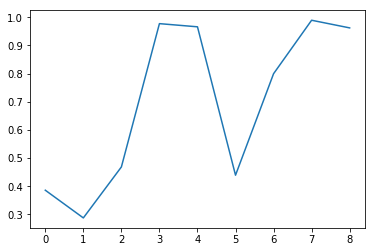

In [45]:
# 1차원 데이터 생성하기 : 난수의 활용
import pandas as pd
import numpy as np

data = np.random.rand(9)  # 0 ~ 1 정규분포 난수 추출하기
data = pd.Series(data)
data.plot()

In [46]:
# 다차원 Matrix를 생성
ndarray_data = np.random.rand(30).reshape(6,5)
print(type(ndarray_data), '\n', ndarray_data)

<class 'numpy.ndarray'> 
 [[0.32283216 0.06631688 0.66390982 0.78264358 0.97592987]
 [0.79039967 0.37218454 0.60983208 0.3341962  0.7744094 ]
 [0.50552548 0.90709231 0.59352017 0.89127062 0.30831324]
 [0.21051488 0.29164449 0.93623924 0.41933112 0.62674445]
 [0.52999448 0.27390042 0.51287199 0.93908673 0.23196836]
 [0.4168567  0.37735825 0.83894292 0.07894747 0.76254729]]


In [47]:
df = pd.DataFrame(ndarray_data,
             columns=['Kospi','Kosdq','MSFT','Nasdaq','China'],
             index = ['2012','2013','2014','2015','2016','2017'])
df

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.322832,0.066317,0.663910,0.782644,0.975930
2013,0.790400,0.372185,0.609832,0.334196,0.774409
2014,0.505525,0.907092,0.593520,0.891271,0.308313
2015,0.210515,0.291644,0.936239,0.419331,0.626744
2016,0.529994,0.273900,0.512872,0.939087,0.231968
2017,0.416857,0.377358,0.838943,0.078947,0.762547


In [48]:
df.columns

Index(['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China'], dtype='object')

In [49]:
df.columns.tolist()

['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China']

In [50]:
df.index

Index(['2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [51]:
df.index.tolist()

['2012', '2013', '2014', '2015', '2016', '2017']

<br>
### **02 DataFrame 의 컬럼 데이터 인덱싱**
DataFrame ==> **Series**

In [52]:
# DataFrame 에서 Column이 가장 중요
# df 의 메서드(함수) 로 '컬럼이름'을 사용가능
df.Kosdq

2012    0.066317
2013    0.372185
2014    0.907092
2015    0.291644
2016    0.273900
2017    0.377358
Name: Kosdq, dtype: float64

In [53]:
# df[ 컬럼명 ] 해당 column 의 자료를 출력
df['Kospi']

2012    0.322832
2013    0.790400
2014    0.505525
2015    0.210515
2016    0.529994
2017    0.416857
Name: Kospi, dtype: float64

<br>
### **03 DataFrame 의 Row 데이터 인덱싱**
DataFrame 부분 편집하기

In [54]:
# df[ :slicing] 은 index 만 영향 
# slicing - string 의 문법들이 그대로 적용
df[:3]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.322832,0.066317,0.663910,0.782644,0.975930
2013,0.790400,0.372185,0.609832,0.334196,0.774409
2014,0.505525,0.907092,0.593520,0.891271,0.308313


<br>
### **04 DataFrame 의 [Row : column]  데이터 인덱싱**
1. .loc[ row : column ] : 인덱스 이름을 사용
1. .iloc[ row : column ] : 인덱스 주소값 0~ 숫자만 가능

In [55]:
# Index LOCation 
df.iloc[ : , : ]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.322832,0.066317,0.663910,0.782644,0.975930
2013,0.790400,0.372185,0.609832,0.334196,0.774409
2014,0.505525,0.907092,0.593520,0.891271,0.308313
2015,0.210515,0.291644,0.936239,0.419331,0.626744
2016,0.529994,0.273900,0.512872,0.939087,0.231968
2017,0.416857,0.377358,0.838943,0.078947,0.762547


In [56]:
df.iloc[:, :3]

,Kospi,Kosdq,MSFT
2012,0.322832,0.066317,0.663910
2013,0.790400,0.372185,0.609832
2014,0.505525,0.907092,0.593520
2015,0.210515,0.291644,0.936239
2016,0.529994,0.273900,0.512872
2017,0.416857,0.377358,0.838943


In [57]:
# 일부분만 별도로 관리하기
df_sum = df.iloc[3:, :3]
df_sum

,Kospi,Kosdq,MSFT
2015,0.210515,0.291644,0.936239
2016,0.529994,0.273900,0.512872
2017,0.416857,0.377358,0.838943
